In [1]:
from nbodykit.lab import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Make mock data matrix:
100 realizations of 3D normal RV: ith row of data must be collection of all attained values of ith R.V.

Data is designed to be fully uncorrelated and with unit variance. So expect covariance matrix to be approximately the 3x3 unit matrix.

In [2]:
data = np.random.normal(0, 1, size=(3,100)) # ; or vstack 100 different 3D columns vects together
cov_mat = np.cov(data)
cov_mat

array([[ 1.23569418, -0.25357088, -0.0630665 ],
       [-0.25357088,  1.32126455,  0.09482994],
       [-0.0630665 ,  0.09482994,  0.92773965]])

### Make mock data from power spectra
Make 30 UniformCatalogs and compute power spectrum for each. Regardless of number of objects in catalog, the length of $(k, P(k))$ is fixed by Nmesh. In data, every computed power spectrum is a column. 

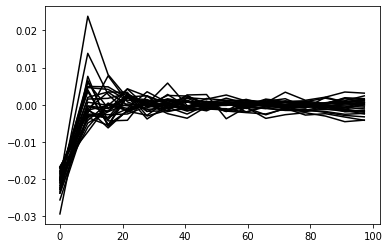

In [3]:
# Make mock data from power spectra
for s in np.arange(30):
    cat = UniformCatalog(nbar=50, BoxSize=1, seed=s)
    mesh = cat.to_mesh(Nmesh=32, position='Position', compensated=True)
    r = FFTPower(mesh, mode='1d')

    pk = r.power['power'].real - r.attrs['shotnoise']
    if s == 0:
        prev = pk
        continue
    prev = np.vstack((prev, pk))
    
    plt.plot(r.power['k'], pk, c='k')
    
data = prev.T
cov_mat = np.cov(data)
cor_mat = np.corrcoef(data)
plt.show()

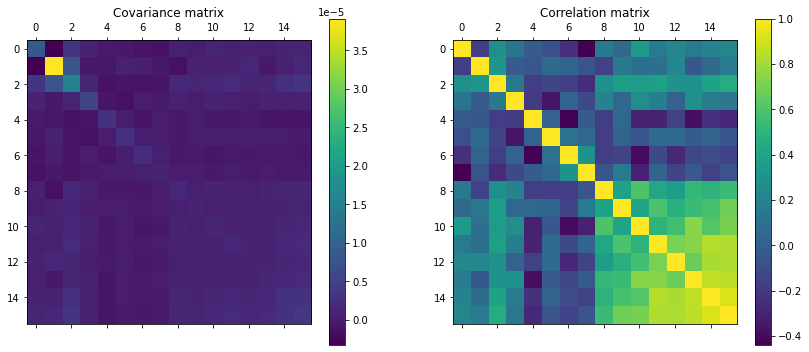

In [89]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

cov_plot = ax1.matshow(cov_mat)
plt.colorbar(cov_plot, ax=ax1)
ax1.set_title('Covariance matrix')

cor_plot = ax2.matshow(cor_mat)
plt.colorbar(cor_plot, ax=ax2)
ax2.set_title('Correlation matrix')

plt.show()

By definition of power spectrum via overdensity field, the amplitude of $P(k)$ measures the degree of clustering above average. For randomly distributed galaxies the clustering is exactly average, such that $P(k)=0$.

In general, power spectrum bins are uncorrelated for small k, while non-linearity induced correlation at larger k. Hence expect diagonally at top left and increasingly important off-diagonal terms when going towards bottom right. As all power spectra vanish for large k, we expect a small value of the covariance for large k. To account for this effect, consider the correlation matrix.

In [ ]:
# To manaully construct the correlation matrix find sigma and use outer product to construct a matrix whoes element (i,j)
# is the product of sigma_i sigma_j
#s = np.sqrt(np.diag(cov_mat))
#cor_mat = cov_mat.toarray() / np.outer(s,s)